## Bike Sharing Demand 
Dataset https://www.kaggle.com/competitions/bike-sharing-demand/ 

In [5]:
import numpy as np #create arrays
import pandas as pd #for data analysis 
import seaborn as sns #for visualisation
import matplotlib.pyplot as plt # for visualisation


from scipy import stats

from datetime import datetime # Importing the datetime module to work with dates and times
import calendar # Importing the calendar module to work with calendars

import warnings #suppress warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Dataset 
df = pd.read_csv('train.csv')
df.head() #show top 5 rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.tail() #show the 5 last rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [8]:
#Check information about the dataset structure and contents
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(10886, 12)

Except one column, all other are float or integer type.

There is date-time data that needs to be converted to datatime format. 

There are 108886 bike rental data points and 12 features. 

There are no missing values in this dataset. 

Looking at the data, seams that the "season", "holiday","workingday" and "weather" columns should be categorical type of data but they are integer/float.  

# Data Exploration

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Feature engineering

In [10]:
# Creating a new column 'date' by extracting the date part from the 'datetime' column
df["date"] = df.datetime.apply(lambda x : x.split()[0])
# Creating a new column 'hour' by extracting the hour part from the 'datetime' column
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
# Creating a new column 'weekday' to represent the day of the week corresponding to each date
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
# Creating a new column 'month' to represent the month name corresponding to each date
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
# Mapping numeric values in the 'season' column to their corresponding season names
df["season"] = df.season.map({1: 'Spring', 
                              2: 'Summer', 
                              3: 'Fall', 
                              4: 'Winter'})
# Mapping numeric values in the 'weather' column to their corresponding weather descriptions
df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 
                                        4 : " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

#Coercing to 'category' type
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for x in categoryVariableList:
    df[x] = df[x].astype("category")

#Dropping unnecessary column 'datetime'
df = df.drop(["datetime"],axis=1) 

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


#### Checking for duplicates

In [11]:
df[df.duplicated()]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month


There were no duplicates found

In [12]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

### Checking for outliers

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

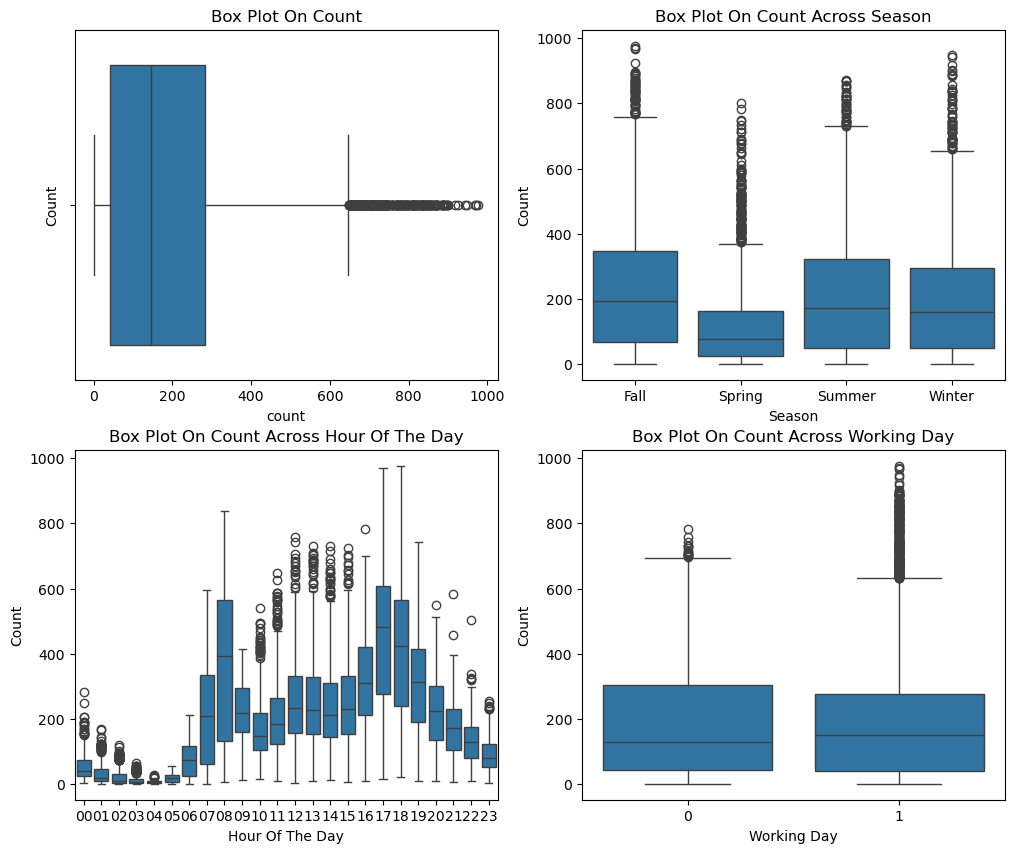

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,x="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")



- A boxplot showing Counts has a lot of outliers which skew the distribution towards right. 
- The number of bike rentals is relatively less in spring then in fall. 
- The median value of rentals at 7AM - 8AM and 5PM - 6PM on "Hour Of The Day" is significantly higher then at other hours. It can be related to school and office customers at that time. 
- The "Boxplot On Count Across Working Day" shows that there are more outliers in Working Days than in Non Working Days.    

### Removing outliers

In [14]:
# Calculate the first quartile (Q1) and third quartile (Q3) for 'count' column
Q1 = df['count'].quantile(0.25)
Q3 = df['count'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'count' is outside the bounds
df_without_outliers = df[(df['count'] >= lower_bound) & (df['count'] <= upper_bound)]

print ("Shape Of The Count Before Ouliers: ",df.shape)
print ("Shape Of The Count After Ouliers: ",df_without_outliers.shape)

Shape Of The Count Before Ouliers:  (10886, 15)
Shape Of The Count After Ouliers:  (10586, 15)


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

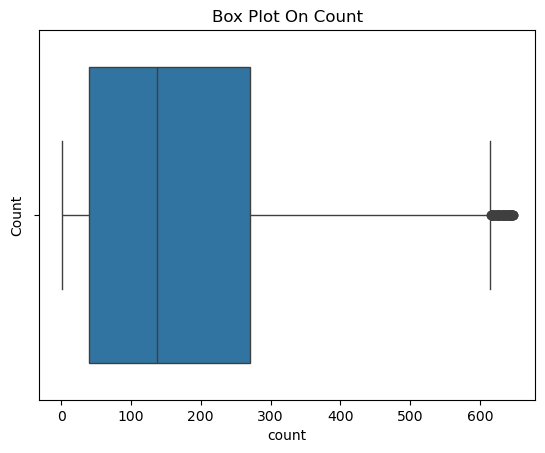

In [15]:
#Create box plot for miles with outliers removed
sns.boxplot(data=df_without_outliers,x="count",orient="v").set(ylabel='Count',title="Box Plot On Count")

### Correlation Analysis

<Axes: >

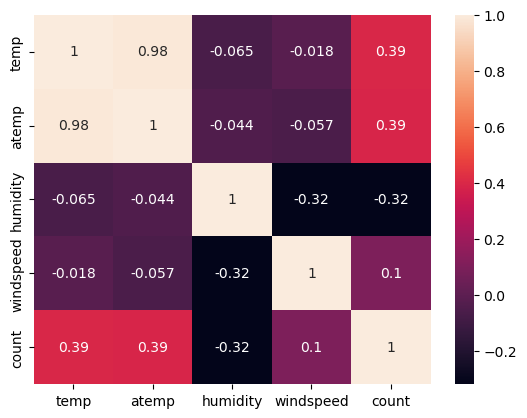

In [16]:
corrMatt = df[["temp","atemp","humidity","windspeed","count"]].corr()
fig,ax = plt.subplots()
sns.heatmap(corrMatt, annot=True)

#### Scatter plot

<Axes: xlabel='humidity', ylabel='count'>

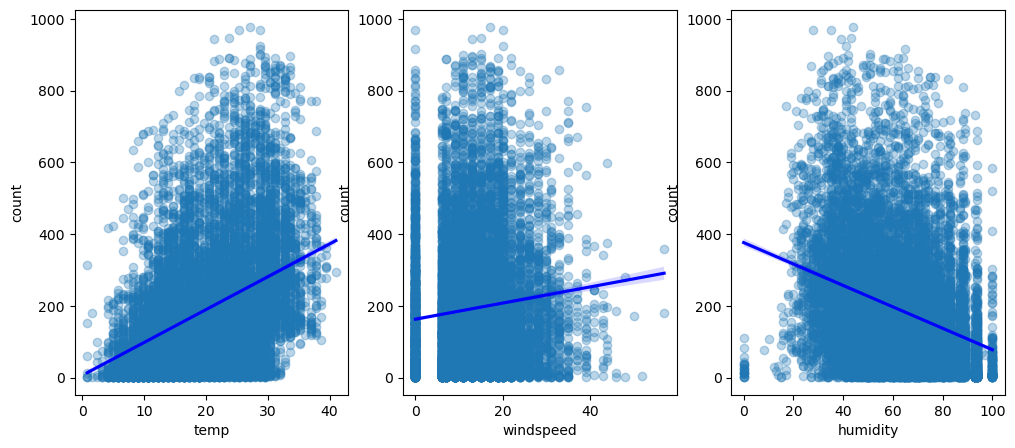

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1, scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})
sns.regplot(x="windspeed", y="count", data=df,ax=ax2, scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})
sns.regplot(x="humidity", y="count", data=df,ax=ax3, scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'blue'})

- Temp and atemp has a positive correlation with count. This means that the higher the tempereture the higher the numbers of rentals. 
- The correlation between count and humidity is negative. This means that the lower the humidity the higher the rentals. 
- The correlation between count and windspeed is very low. Therefore, the windspeed feature will be removed. 
- The scatter plot shows a lot of missing values or errors in wind speed data what also can be a reason of bad correlation with the bike rentals.

### Distribution of Data

((array([-3.82466286, -3.60029062, -3.47714484, ...,  3.47714484,
          3.60029062,  3.82466286]),
  array([0.        , 0.        , 0.        , ..., 6.47234629, 6.47234629,
         6.47234629])),
 (1.3975968789209923, 4.4940729953058804, 0.951622729043356))

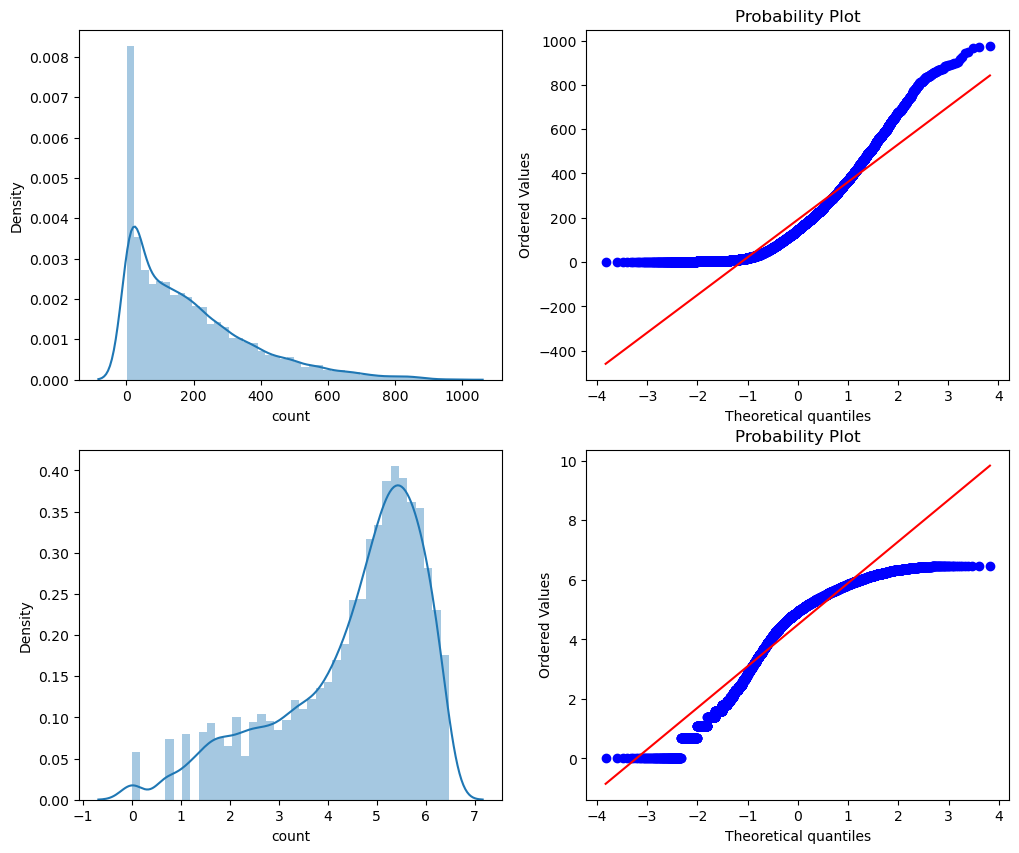

In [18]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(df["count"],ax=axes[0][0])
stats.probplot(df["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(df_without_outliers["count"]),ax=axes[1][0])
stats.probplot(np.log(df_without_outliers["count"]), dist='norm', fit=True, plot=axes[1][1])

- The distribution is showing that the target value is clustering around 0 and it is skewed towards right. For the most machine learning techniques the data should be normaly distributed to perform well. 
- After log trasformation on 'count' variable with previously removed outliers, it looks closer to the normal distribution than before the transformation but stil not perfectly.

## Data Visualisation

### Count vs Month, Season, Hour, Weekday, Usertype and Weather

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weather'),
 None]

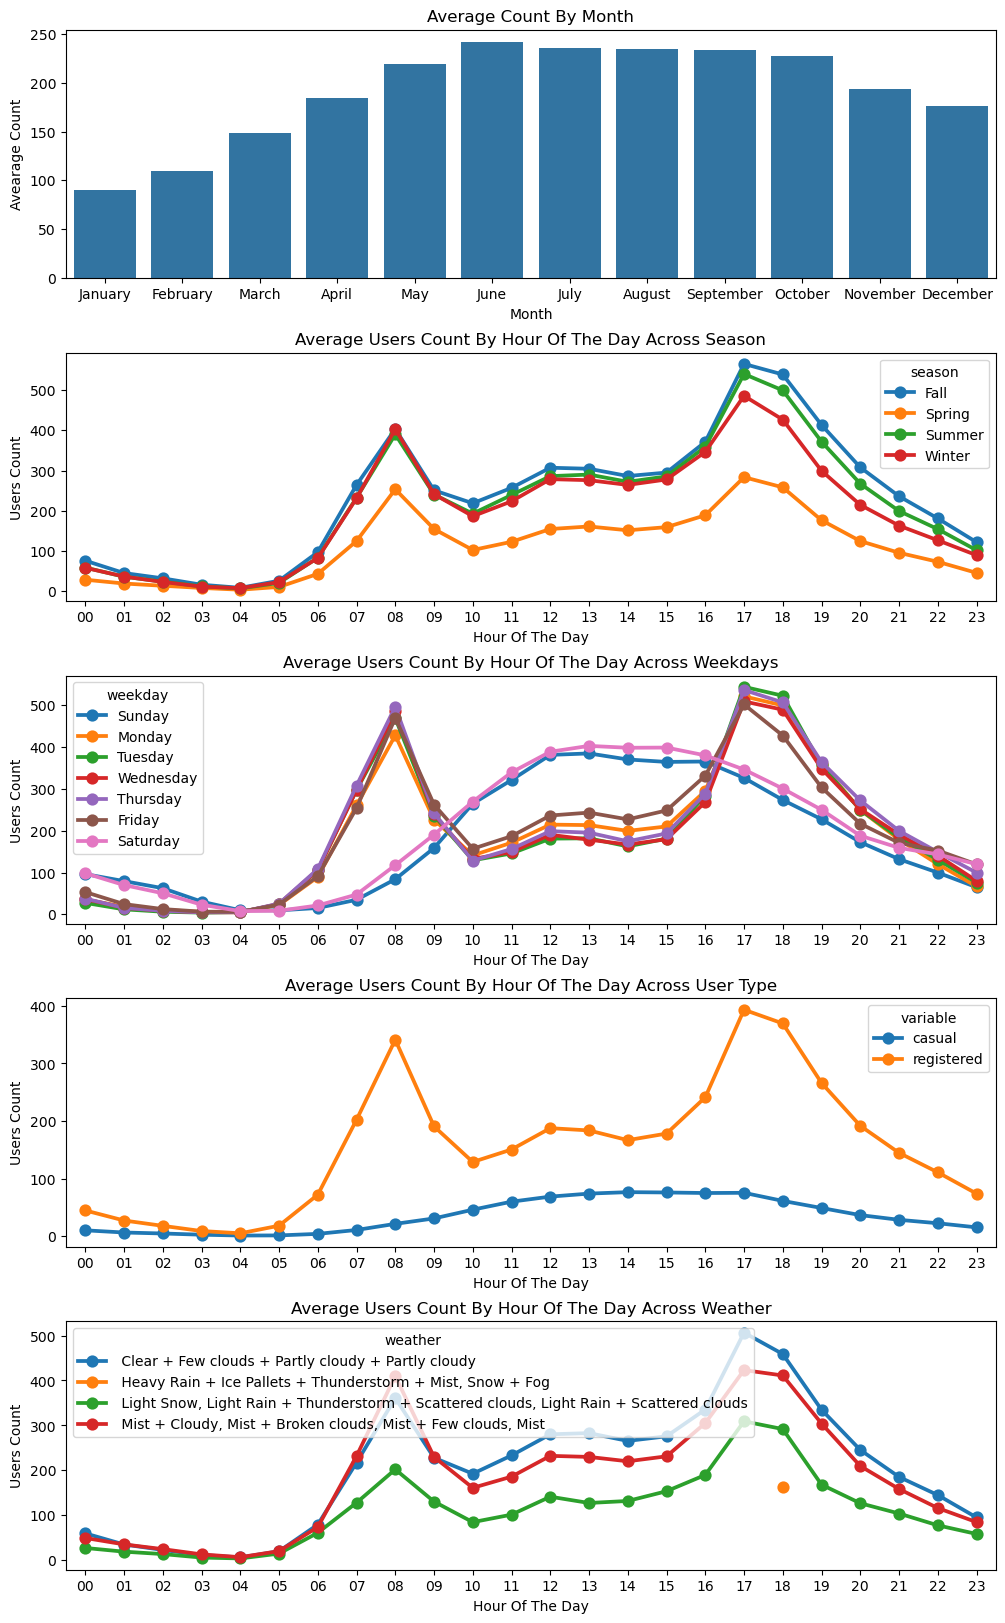

In [19]:
# Creating subplots with 5 rows and 1 column
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5, figsize=(12, 20), tight_layout=True, gridspec_kw={'hspace': 0.3})

# Define the order of months and weekdays
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# Plotting average count by month
monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

# Plotting average users count by hour of the day across season
hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

# Plotting average users count by hour of the day across weekdays
hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

# Plotting average users count by hour of the day across user type (casual and registered)
hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

# Plotting average users count by hour of the day across weather
hourAggregated = pd.DataFrame(df.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weather"], data=hourAggregated, join=True,ax=ax5)
ax5.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weather",label='big')


- There is higher demand for bicycles during the summer. 
- During the work week more people rent bicycles at 7AM-8AM and 5PM-6PM. As was mentioned previously, it can be related to school and office customers at that time. However, during the weekend the number of rentals is highest between 10AM and 4PM.
- People who use bikes for commuting to schools and offices tend to be registered users.
- The number of rentals is highest when the weather is good, but there are a few rentals at 18:00 during heavy rain and snow. 

# Model Building

## Data preprocessing

In [20]:
# Define the categorical features
categoricalFeatures = ["season","holiday","workingday","weather","weekday","month","hour"]
# Define the numerical features
numericalFeatures = ["temp","humidity","atemp"]
# Define the features to be dropped from the DataFrame
dropFeatures = ['casual',"count","date","registered", "windspeed"]
# Extract the target variable 'count' from the DataFrame
df_target = df_without_outliers['count']

### Droping unnecessery values

In [21]:
# Drop specified features from the DataFrame to create the training dataset
df_train = df_without_outliers.drop(dropFeatures, axis=1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,00,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,01,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,02,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,03,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,04,Saturday,January


In [22]:
#Perform one-hot encoding to convert non-numerical data to numerical
df_encoded = pd.get_dummies(df_train[categoricalFeatures])
print(df_encoded.shape)

(10586, 55)


### Splitting the data into training and validation sets

In [23]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function

# Log-transformation of the target variable
df_target_log = np.log(df_target)

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(df_encoded, df_target_log, 
                                                                test_size=0.2, random_state=2309)
# Print the shapes
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((8468, 55), (2118, 55), (8468,), (2118,))

### Model Evaluation 

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

# Define a function to calculate the root mean squared logarithmic error (RMSLE)
def rmsle(y, pred):  
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# Define a function to evaluate the regression model using RMSLE, MSE, R2, MAE
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    mae = mean_absolute_error(y, pred)


    print('RMSLE: {0:.3f}'.format(rmsle_val))
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)
    print("Mean Absolute Error (MAE):", mae)

## Linear Regression Model

In [25]:
# Import linear regression, ridge regression, and lasso regression models from scikit-learn
from sklearn.linear_model import LinearRegression , Ridge , Lasso 

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_validation)

# Evaluate the regression model
evaluate_regr(y_validation, pred)

RMSLE: 0.172
Mean Squared Error (MSE): 0.4606673321505702
R-squared (R2) Score: 0.773541140547527
Mean Absolute Error (MAE): 0.515551831620283


## Regularization Models - Ridge and Lasso 

In [26]:
# Define a function to train the model, make predictions, and evaluate performance
def get_model_predict(model, X_train, X_validation, y_train, y_validation, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)

    print('#',model.__class__.__name__,)
    evaluate_regr(y_validation, pred) 

# Initialize linear regression, ridge regression, and lasso regression models
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

# Iterate through each model and evaluate its performance
for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_validation, y_train, y_validation,is_expm1=True)

# LinearRegression
RMSLE: 0.172
Mean Squared Error (MSE): 0.4606673321505702
R-squared (R2) Score: 0.773541140547527
Mean Absolute Error (MAE): 0.515551831620283
# Ridge
RMSLE: 0.173
Mean Squared Error (MSE): 0.4602986350276751
R-squared (R2) Score: 0.7737223878904729
Mean Absolute Error (MAE): 0.5161197485456955
# Lasso
RMSLE: 0.183
Mean Squared Error (MSE): 0.5090303573310394
R-squared (R2) Score: 0.7497664233977106
Mean Absolute Error (MAE): 0.5490079110389079


## Random Forest and Gradient Boosting Models

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg]:
    get_model_predict(model,X_train, X_validation, y_train, y_validation)

# RandomForestRegressor
RMSLE: 0.140
Mean Squared Error (MSE): 0.2649906629642577
R-squared (R2) Score: 0.8697335818880548
Mean Absolute Error (MAE): 0.3952542860359248
# GradientBoostingRegressor
RMSLE: 0.124
Mean Squared Error (MSE): 0.2056764635344291
R-squared (R2) Score: 0.8988917726577558
Mean Absolute Error (MAE): 0.35130111484726845
